# Trailing 63 day SPY volatility
Robert Sloan <br>
5/23/2019 <br>
replicating Al Zmyslowski's AAII CIMI 10M SMA SPY Market timer <br>
SPY trailing 63 day volatility (Standard Deviation)if less than 1% go Long if >1% go partialy to cash (BIL T-Bills)<br>
Using Yahoo Adjusted Close for SPY in calculations.<br>
Variations include use of  SPLV, SDS for high and low vol markets; use of IEF, TLT, etc. instead of cash for volatility reduction instrument<br>
Can implement in 5 or 10% increments to cut down on trading frequency <br>
TO DO<br>
> Need to define % in Cash if Standard Deviation (SD) is >1% 


## load libraries

In [38]:
import pandas as pd
pd.__version__
import matplotlib.pyplot as plt
#All matplotlib plots appear inline in jupyter notebook
%matplotlib inline 

## using pandas-datareader to get Yahoo data
getting finacial data using panda-datareader https://github.com/pydata/pandas-datareader
<br>
First must install package at a command prompt in terminal:  > conda install -c anaconda pandas-datareader


In [39]:
from pandas_datareader import data

### Use datetime library for dates and times 

In [40]:
import time
import datetime
currentDT = datetime.datetime.now()

todays_date = str(currentDT.year) + "-" + str(currentDT.month) + "-"+  str(currentDT.day)
print(todays_date)

2019-5-23


### get adjusted close SPY data

Date
2010-01-04    94.130867
2010-01-05    94.380074
2010-01-06    94.446495
2010-01-07    94.845207
2010-01-08    95.160805
Name: Adj Close, dtype: float64

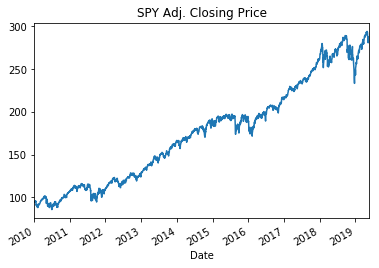

In [41]:
# Get the SPY adjusted close.
start_date = '2010-01-04'
end_date = todays_date

spy_data = data.DataReader("SPY", 
                       start=start_date, 
                       end=end_date, 
                       data_source='yahoo')['Adj Close']


spy_data.plot(title='SPY Adj. Closing Price')# Convert the adjusted closing prices to cumulative returns.
spy_data.head()

### For missing data or starting on a non-market day

### calculate and plot 63 Day SMA and Volatility (standard deviation)

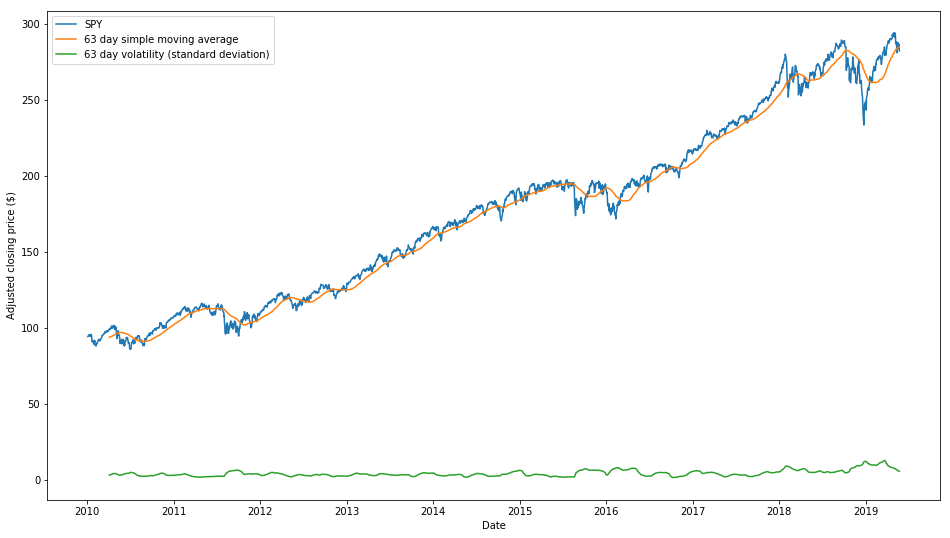

In [42]:
# Get the spy_data timeseries. This now returns a Pandas Series object indexed by date.

# Calculate the 63 day moving averages of the adjusted closing prices
spy_63d_sma = spy_data.rolling(window=63).mean()
# Calculate the 63 day moving averages of the adjusted closing prices
spy_63d_std = spy_data.rolling(window=63).std()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(spy_data.index, spy_data, label='SPY')
ax.plot(spy_63d_sma.index, spy_63m_sma, label='63 day simple moving average')
ax.plot(spy_63d_std.index, spy_63m_std, label='63 day volatility (standard deviation)')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

### Determine last market day of last month and the month before

In [43]:
# Determine last market day of last month
now = time.localtime()
# Get the last day of last month by taking the first day of this month
# and subtracting 1 day.
lastDay = datetime.date(now.tm_year, now.tm_mon, 1) - datetime.timedelta(1)
# Set the day to 1 gives us the start of the month
firstDay = lastDay.replace(day=1)
lastDayOfLastMonth = spy_data.loc[firstDay:lastDay].last('1D').index # get the last market day last month
strLastDayOfLastMonth = spy_data.loc[firstDay:lastDay].last('1D').index[0].strftime('%Y-%m-%d') # get the last market day last month
print("Last Market Day last Month", strLastDayOfLastMonth)

# Determine last market day of the month before last
# Get the last day of last month by taking the first day of last month
# and subtracting 1 day.
lastDay = datetime.date(now.tm_year, now.tm_mon-1, 1) - datetime.timedelta(1)
# Set the day to 1 gives us the start of the month
firstDay = lastDay.replace(day=1)
lastDayOfMonthBeforeLast = spy_data.loc[firstDay:lastDay].last('1D').index # get the last market day last month
strLastDayOfMonthBeforeLast = spy_data.loc[firstDay:lastDay].last('1D').index[0].strftime('%Y-%m-%d') # and month before last
print("Last Market Day Month before last", strLastDayOfMonthBeforeLast)

Last Market Day last Month 2019-04-30
Last Market Day Month before last 2019-03-29


### Calculate current market indicator and for last month and the month before

In [44]:
# current 63 day volatility (Standard Deviation) SPY
current_63d_std_spy = float(spy_63d_std[todays_date])
if (current_63d_std_spy>1):
    status = 'LONG'
else:
    status = 'SHORT'
print("Current Indicator: " + status + " (" + str(current_63d_std_spy) + "%)")

# Last day of last month 63 day volatility (standard deviation) SPY
endOfLastMonth_63d_std_spy = float(spy_63d_std[lastDayOfLastMonth].values)
if (endOfLastMonth_63d_std_spy>1):
    statusLastMonth = 'LONG'
else:
    statusLastMonth = 'SHORT'
print("Last Months Indicator: " + statusLastMonth + " (" + str(endOfLastMonth_63d_std_spy) + "%)")

# Last day of last month 63 day volatility (standard deviation) SPY
endOfMonthBeforeLasts_63d_std_spy = float(spy_63d_std[lastDayOfMonthBeforeLast].values)
if (endOfMonthBeforeLasts_63d_std_spy>1):
    statusMonthBeforeLast = 'LONG'
else:
    statusMonthBeforeLast = 'SHORT'
print("Month before lasts Indicator: " + statusMonthBeforeLast + " (" + str(endOfMonthBeforeLasts_63d_std_spy) + "%)")

Current Indicator: LONG (5.5446464466539105%)
Last Months Indicator: LONG (7.472639540254066%)
Month before lasts Indicator: LONG (10.52421856178737%)


### Create output DataFrame

In [45]:
indicators = pd.DataFrame([{'Technical Indicator': 'Trailing 6d3d SPY Volatility',
                            strLastDayOfMonthBeforeLast:statusMonthBeforeLast + " (" + str(endOfMonthBeforeLasts_63d_std_spy) + "%)", 
                            strLastDayOfLastMonth:statusLastMonth + " (" + str(endOfLastMonth_63d_std_spy) + "%)", 
                            'Comment': '1% upper limit/leverage factor'}], 
                           columns=['Technical Indicator', strLastDayOfLastMonth, strLastDayOfMonthBeforeLast,
                                    'Comment'])
indicators

,Technical Indicator,2019-04-30,2019-03-29,Comment
0,Trailing 6d3d SPY Volatility,LONG (7.472639540254066%),LONG (10.52421856178737%),1% upper limit/leverage factor


### Save as Excel file

In [46]:
writer = pd.ExcelWriter('indicator_sheet Trailing 63 day SPY Volatility.xlsx')
indicators.to_excel(writer,'Indicators', index=False)
writer.save()